# Random Forest Model interpretation

In [4]:
%load_ext autoreload
%autoreload 2
# reloads modules automatically before entering 
# the execution of code typed at the IPython prompt.


# draw plots in the notebook
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
# import libraries 
from fastai.imports import *
from fastai.structured import *
from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics

In [6]:
set_plot_sizes(12,14,16)

We can create a variable PATH for where our project files such as csv file will be stored to make our work easier. The PATH will be different based on where your files are.

In [7]:
PATH = "/media/muoki/data/documents/code_training/portfolio/DataScienceProjects/fastai_Intro_ml/"

<h4>Loading the data.</h4>
<p>We will use a feather formart that we had earlier saved. Otherwise we can use pandas to read the csv file.</p>

In [8]:
import feather
df_raw = feather.read_dataframe(f'{PATH}tmp/bulldozers-raw')

In [9]:
# incase you don't have the feather formart
# df_raw = pd.read_csv(f'{PATH}Train.csv', low_memory=False, 
  #                   parse_dates=["saledate"])

In [10]:
df_trn, y_trn, nas = proc_df(df_raw, 'SalePrice')

In [11]:
def split_vals(a,n): 
    return a[:n], a[n:]


n_valid = 12000
n_trn = len(df_trn)-n_valid
X_train, X_valid = split_vals(df_trn, n_trn)
y_train, y_valid = split_vals(y_trn, n_trn)
raw_train, raw_valid = split_vals(df_raw, n_trn)

In [12]:
def rmse(x,y):
    return math.sqrt(((x-y)**2).mean())

def print_score(m):
    res = [rmse(m.predict(X_train), y_train), rmse(m.predict(X_valid), y_valid),
                m.score(X_train, y_train), m.score(X_valid, y_valid)]
    if hasattr(m, 'oob_score_'): res.append(m.oob_score_)
    print(res)

In [13]:
df_raw

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,saleDay,saleDayofweek,saleDayofyear,saleIs_month_end,saleIs_month_start,saleIs_quarter_end,saleIs_quarter_start,saleIs_year_end,saleIs_year_start,saleElapsed
0,1139246,11.097410,999089,3157,121,3.0,2004,68.0,2,521D,...,16,3,320,False,False,False,False,False,False,1163635200
1,1139248,10.950807,117657,77,121,3.0,1996,4640.0,2,950FII,...,26,4,86,False,False,False,False,False,False,1080259200
2,1139249,9.210340,434808,7009,121,3.0,2001,2838.0,0,226,...,26,3,57,False,False,False,False,False,False,1077753600
3,1139251,10.558414,1026470,332,121,3.0,2001,3486.0,0,PC120-6E,...,19,3,139,False,False,False,False,False,False,1305763200
4,1139253,9.305651,1057373,17311,121,3.0,2007,722.0,1,S175,...,23,3,204,False,False,False,False,False,False,1248307200
5,1139255,10.184900,1001274,4605,121,3.0,2004,508.0,2,310G,...,18,3,353,False,False,False,False,False,False,1229558400
6,1139256,9.952278,772701,1937,121,3.0,1993,11540.0,0,790ELC,...,26,3,239,False,False,False,False,False,False,1093478400
7,1139261,10.203592,902002,3539,121,3.0,2001,4883.0,0,416D,...,17,3,321,False,False,False,False,False,False,1132185600
8,1139272,9.975808,1036251,36003,121,3.0,2008,302.0,2,430HAG,...,27,3,239,False,False,False,False,False,False,1251331200
9,1139275,11.082143,1016474,3883,121,3.0,1000,20700.0,1,988B,...,9,3,221,False,False,False,False,False,False,1186617600


# Confidence based on tree variance

In [14]:
set_rf_samples(50000)

a subset will be both faster, and also provide better interpretability (since an overfit model will not provide much variance across trees).

In [15]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5, n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20599780134191104, 0.24933519226561465, 0.9113129934855525, 0.8889764432909312, 0.8942567901695144]


In [16]:
%time preds = np.stack([t.predict(X_valid) for t in m.estimators_])
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 1.65 s, sys: 33.4 ms, total: 1.69 s
Wall time: 1.69 s


(9.360448003599481, 0.3384804390796919)

In [18]:
def get_preds(t): 
    return t.predict(X_valid)
%time preds = np.stack(parallel_trees(m, get_preds))
np.mean(preds[:,0]), np.std(preds[:,0])

CPU times: user 127 ms, sys: 132 ms, total: 259 ms
Wall time: 1.1 s


(9.360448003599481, 0.3384804390796919)

In [19]:
?parallel_trees


different trees are giving different estimates this this auction. In order to see how prediction confidence varies, we can add this into our dataset.

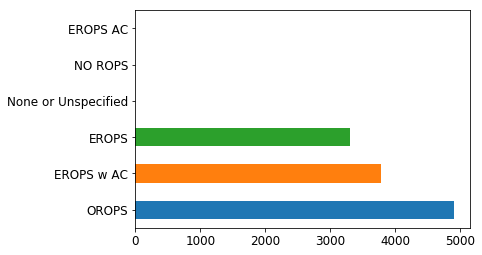

In [21]:
x = raw_valid.copy()
x['pred_std'] = np.std(preds, axis=0) #create a column for std of prediction
x['pred'] = np.mean(preds, axis=0) # create a column for mean of preds
x.Enclosure.value_counts().plot.barh();

In [22]:
flds = ['Enclosure', 'SalePrice', 'pred', 'pred_std']
enc_summ = x[flds].groupby('Enclosure', as_index=False).mean()
enc_summ

,Enclosure,SalePrice,pred,pred_std
0,EROPS,9.849178,9.837734,0.279412
1,EROPS AC,NaN,NaN,NaN
2,EROPS w AC,10.623971,10.578693,0.267515
3,NO ROPS,NaN,NaN,NaN
4,None or Unspecified,NaN,NaN,NaN
5,OROPS,9.682064,9.684479,0.223507


sales and pred mean are close

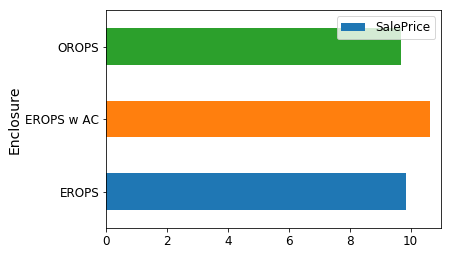

In [23]:
enc_summ = enc_summ[~pd.isnull(enc_summ.SalePrice)]
enc_summ.plot('Enclosure', 'SalePrice', 'barh', xlim=(0,11));

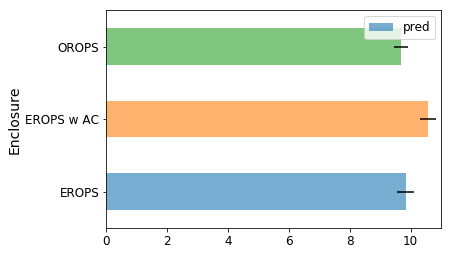

In [24]:
enc_summ.plot('Enclosure', 'pred', 'barh', xerr='pred_std', alpha=0.6, xlim=(0,11));

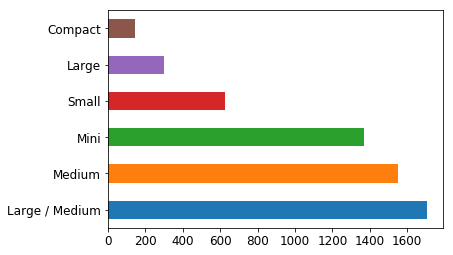

In [25]:
raw_valid.ProductSize.value_counts().plot.barh();

In [26]:
flds = ['ProductSize', 'SalePrice', 'pred', 'pred_std']
summ = x[flds].groupby(flds[0]).mean()
summ

,SalePrice,pred,pred_std
ProductSize,,,
Compact,9.735093,9.865647,0.335289
Large,10.470589,10.392682,0.378300
Large / Medium,10.691871,10.653211,0.301683
Medium,10.681511,10.626946,0.292705
Mini,9.535147,9.561932,0.250101
Small,10.324448,10.326343,0.317797


In [27]:
(summ.pred_std/summ.pred).sort_values(ascending=False)

ProductSize
Large             0.036401
Compact           0.033986
Small             0.030775
Large / Medium    0.028319
Medium            0.027544
Mini              0.026156
dtype: float64

# Feature importance
this tells us which columns matter

In [29]:
fi = rf_feat_importance(m, df_trn); fi[:10]

,cols,imp
5,YearMade,0.175347
13,ProductSize,0.109974
37,Coupler_System,0.105138
14,fiProductClassDesc,0.082391
2,ModelID,0.053539
63,saleElapsed,0.050449
39,Hydraulics_Flow,0.050233
10,fiSecondaryDesc,0.045298
19,Enclosure,0.032862
38,Grouser_Tracks,0.031756


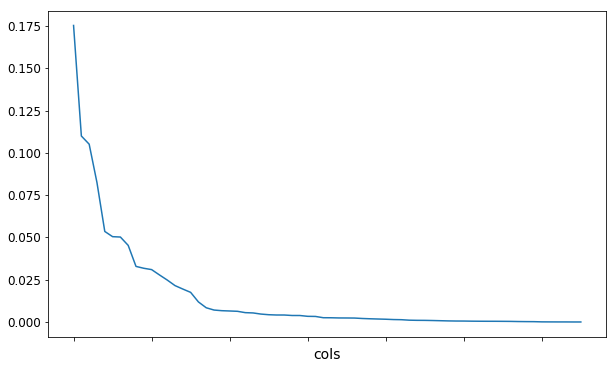

In [30]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

we can plot columns in the orderof importance

In [31]:
def plot_fi(fi): return fi.plot('cols', 'imp', 'barh', figsize=(12,7), legend=False)

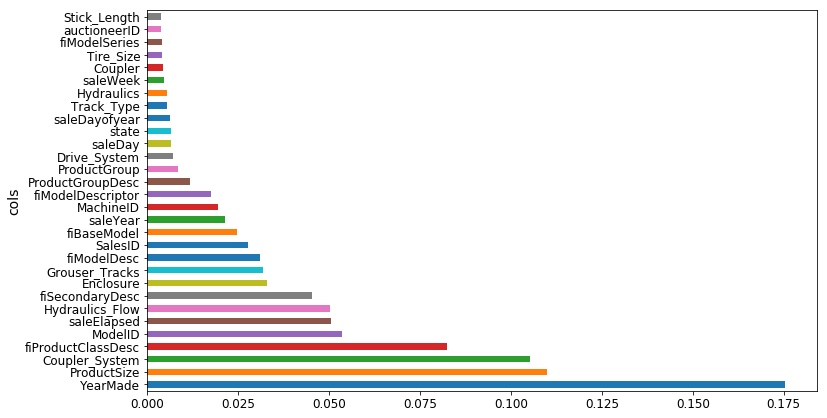

In [32]:
plot_fi(fi[:30])

In [33]:
to_keep = fi[fi.imp>0.005].cols
len(to_keep)

24

We removed columns with an importance of less than 0.005 

In [34]:
df_keep = df_trn[to_keep].copy()
X_train, X_valid = split_vals(df_keep, n_trn)

In [35]:
m = RandomForestRegressor(n_estimators=40, min_samples_leaf=3, max_features=0.5,
                          n_jobs=-1, oob_score=True)
m.fit(X_train, y_train)
print_score(m)

[0.20681541985309143, 0.24593806494604695, 0.9106075875013889, 0.891981167916748, 0.8942465898577288]


The R^2 didn't change as the less important columns didn't have alot of impact. It also addresses colinearity

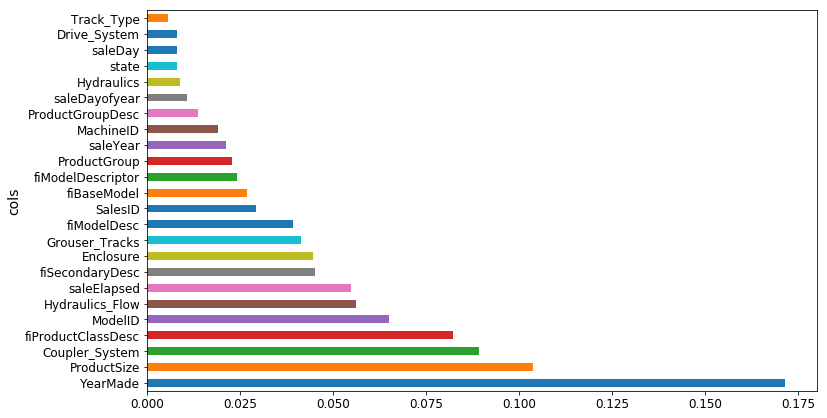

In [36]:
fi = rf_feat_importance(m, df_keep)
plot_fi(fi)